## KNN

Data cleaning

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
tweets_train = pd.read_csv("tweets_train.csv")
tweets_test = pd.read_csv("tweets_test.csv")

In [35]:
X_train = tweets_train.drop(columns = 'Unnamed: 0')
X_test = tweets_test.drop(columns = 'Unnamed: 0')

In [31]:
tweets_train_raw = pd.read_csv("tweets_train(tokenize).csv")
y_train = tweets_train_raw['Tag']
tweets_test_raw = pd.read_csv("tweets_test(tokenize).csv")
y_test = tweets_test_raw['Tag']

In [40]:
tweets_train = X_train.copy()
tweets_test = X_test.copy()
tweets_train['Tag'] = y_train
tweets_test['Tag'] = y_test

In [43]:
tweets_train = tweets_train.replace(['Positive','Negative','Neutral'],[1,-1,0])
tweets_test = tweets_test.replace(['Positive','Negative','Neutral'],[1,-1,0])

In [144]:
y_train = tweets_train['Tag']
y_test = tweets_test['Tag']

In [51]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
tweets_scaled = scaler.fit_transform(tweets_train)

tweets_scaled = pd.DataFrame(tweets_scaled, columns=tweets_train.columns)
tweets_scaled.describe()

,accept,accord,account,accumul,across,action,activ,actual,ada,address,...,work,world,worth,would,xrp,year,yet,your,youtub,Tag
count,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,...,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04,1.201800e+04
mean,-2.795535e-16,-4.724199e-16,2.767128e-16,5.709662e-16,5.358018e-16,-1.899333e-16,4.343270e-16,7.251254e-16,2.734254e-15,-6.867184e-16,...,7.956483e-16,-3.198196e-17,-6.118213e-16,5.695228e-17,1.539171e-15,7.147904e-17,4.725931e-17,7.166380e-18,8.100157e-16,7.876505e-16
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,...,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.168134e-01,-7.201167e-02,-8.101781e-02,-7.100012e-02,-7.873944e-02,-8.398445e-02,-9.528744e-02,-7.487473e-02,-8.813763e-02,-7.146179e-02,...,-9.642120e-02,-1.399184e-01,-1.154974e-01,-1.606882e-01,-8.740436e-02,-1.775351e-01,-8.590712e-02,-7.897088e-02,-7.431076e-02,-1.256240e+00
25%,-1.168134e-01,-7.201167e-02,-8.101781e-02,-7.100012e-02,-7.873944e-02,-8.398445e-02,-9.528744e-02,-7.487473e-02,-8.813763e-02,-7.146179e-02,...,-9.642120e-02,-1.399184e-01,-1.154974e-01,-1.606882e-01,-8.740436e-02,-1.775351e-01,-8.590712e-02,-7.897088e-02,-7.431076e-02,-1.256240e+00
50%,-1.168134e-01,-7.201167e-02,-8.101781e-02,-7.100012e-02,-7.873944e-02,-8.398445e-02,-9.528744e-02,-7.487473e-02,-8.813763e-02,-7.146179e-02,...,-9.642120e-02,-1.399184e-01,-1.154974e-01,-1.606882e-01,-8.740436e-02,-1.775351e-01,-8.590712e-02,-7.897088e-02,-7.431076e-02,-1.376587e-01
75%,-1.168134e-01,-7.201167e-02,-8.101781e-02,-7.100012e-02,-7.873944e-02,-8.398445e-02,-9.528744e-02,-7.487473e-02,-8.813763e-02,-7.146179e-02,...,-9.642120e-02,-1.399184e-01,-1.154974e-01,-1.606882e-01,-8.740436e-02,-1.775351e-01,-8.590712e-02,-7.897088e-02,-7.431076e-02,9.809230e-01
max,2.289735e+01,1.388664e+01,2.108577e+01,3.548231e+01,2.482364e+01,2.285522e+01,2.035408e+01,1.335564e+01,3.808260e+01,2.719291e+01,...,2.706272e+01,1.299710e+01,2.251572e+01,1.575539e+01,1.992070e+01,1.524620e+01,2.285702e+01,3.341769e+01,1.345700e+01,9.809230e-01


Calculate WCSS to find best number of clusters

In [55]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 100):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, random_state=88)
    kmeans.fit(tweets_scaled)
    wcss.append(kmeans.inertia_)

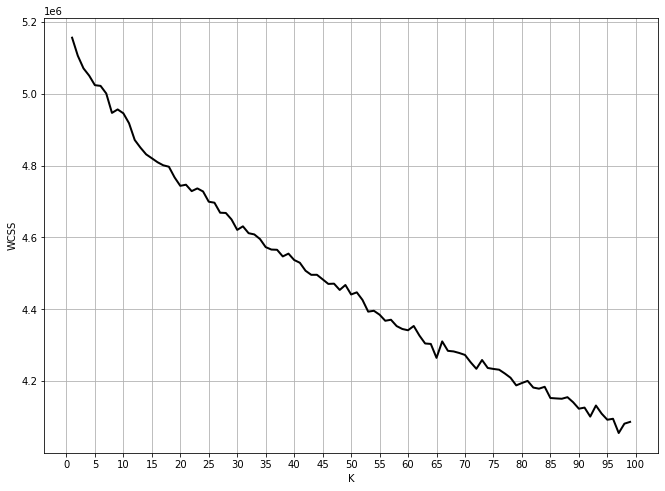

In [57]:
plt.figure(figsize=(11,8))
plt.plot(range(1, 100), wcss, linewidth=2, color='black')
plt.xticks(np.linspace(0,100,21))
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(axis='both')
plt.show()

Since the WCSS is small, we choose the proper k, which is 50

In [91]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [216]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.46554067171423025


Method One: use Neighborhood Component Analysis

In [217]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
nca.fit(X_train, y_train)
knn.fit(nca.transform(X_train), y_train)
print(knn.score(nca.transform(X_test), y_test))

0.46728790526111436


Method Two: choose the first 200 most frequent words

In [207]:
freq = X_train.sum().sort_values(ascending=False)
X_train_new = X_train[freq.index[0:200]]
freq_test = X_test.sum().sort_values(ascending=False)
X_test_new = X_test[freq_test.index[0:200]]

In [212]:
knn_new = KNeighborsClassifier(n_neighbors=50)
knn_new.fit(X_train_new, y_train)

KNeighborsClassifier(n_neighbors=50)

In [213]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = knn_new.predict(X_test_new)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[ 541   18 1222]
 [ 309    7  631]
 [ 625    8 1790]]

Accuracy: 0.45389244806833623
